In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/StressLevelDataset.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1100, 21)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [16]:
print("Dataset shape:", df.shape)

X = df.drop(columns=['stress_level'])
y = df['stress_level']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

print("\nStress level distribution:")
print(y.value_counts())


Dataset shape: (1100, 21)
Features shape: (1100, 20)
Target shape: (1100,)

Stress level distribution:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (880, 20) (880,)
Testing set shape: (220, 20) (220,)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled testing shape:", X_test_scaled.shape)

Scaled training shape: (880, 20)
Scaled testing shape: (220, 20)


In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial",
    random_state=42
)

# Train the model
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


/home/sourav/AI-powered-Student-Success-Career-Readiness-Platform/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8818181818181818

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.92      0.91        72
           2       0.88      0.88      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



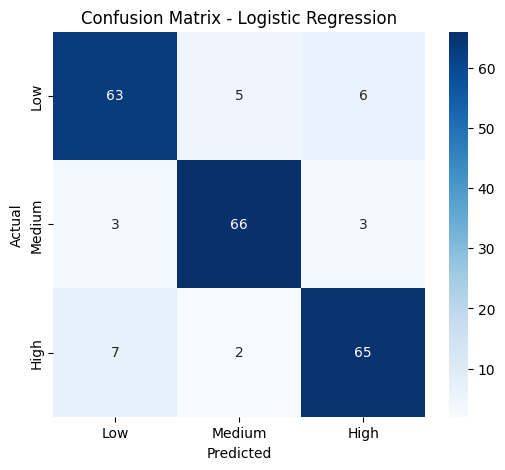

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", log_reg_accuracy)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

# Train model
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


Random Forest Accuracy: 0.8954545454545455

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        74
           1       0.91      0.93      0.92        72
           2       0.86      0.91      0.88        74

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



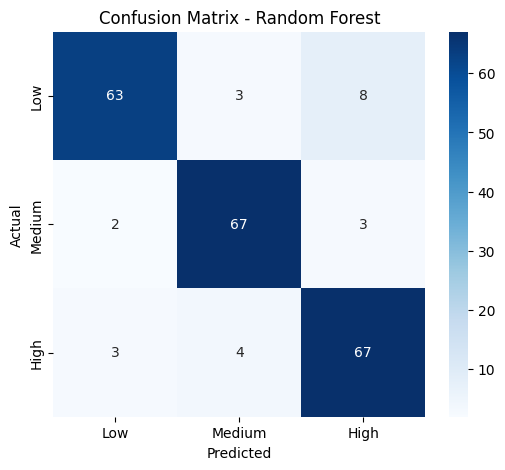

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Classification Report
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Top 10 Important Features:


,Feature,Importance
5,blood_pressure,0.147408
6,sleep_quality,0.081632
14,teacher_student_relationship,0.069102
12,academic_performance,0.068744
3,depression,0.063645
16,social_support,0.058708
11,basic_needs,0.058596
1,self_esteem,0.054692
19,bullying,0.053340
0,anxiety_level,0.052182


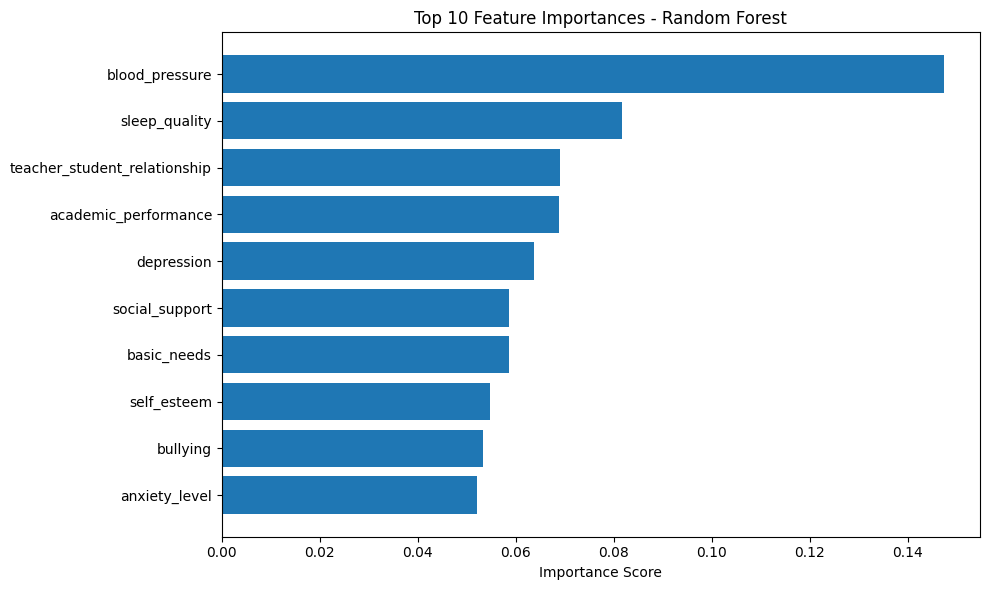

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create dataframe
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top 10 important features
print("Top 10 Important Features:")
display(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["Feature"][:10][::-1],
    feature_importance_df["Importance"][:10][::-1]
)
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    rf_model,
    X,
    y,
    cv=cv,
    scoring="accuracy"
)

print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-validation accuracies: [0.87727273 0.89090909 0.86363636 0.87272727 0.88636364]
Mean CV Accuracy: 0.8781818181818182
Standard Deviation: 0.00970643477457391


In [25]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Test Accuracy": [log_reg_accuracy, rf_accuracy],
    "CV Mean Accuracy": [None, cv_scores.mean()]
})

results


,Model,Test Accuracy,CV Mean Accuracy
0,Logistic Regression,0.881818,NaN
1,Random Forest,0.895455,0.878182


In [26]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "../models/stress_level_random_forest.pkl")

# Save the scaler (important for inference)
joblib.dump(scaler, "../models/stress_level_scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
